<a href="https://colab.research.google.com/github/AqeelLaghari/Python-Data-Science-Projects/blob/main/Spam_Mail_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing The Libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


Importing The Dataset

In [50]:
df=pd.read_csv('/content/mail_data.csv')


Analyzing The Dataset

In [51]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [53]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


([<matplotlib.patches.Wedge at 0x7e5b01f4a1d0>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'Ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'Spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.6%'),
  Text(0.5475662602592474, -0.2452981667801496, '13.4%')])

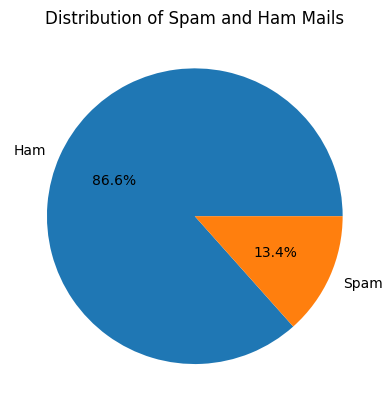

In [54]:
plt.title("Distribution of Spam and Ham Mails")
labels = ['Ham', 'Spam']
plt.pie(df['Category'].value_counts(),labels=labels,autopct='%1.1f%%')

Preprocessing for machine learning model

In [55]:
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [56]:
df = df.where((pd.notnull(df)),'')

In [57]:
X=df['Message']
Y=df['Category']

Splitting into training and test data

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)



Feature Extraction

In [61]:
Feature_Extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [62]:
X_train=Feature_Extraction.fit_transform(X_train)
X_test=Feature_Extraction.transform(X_test)

Training The Model

In [63]:
model=LogisticRegression()


In [64]:
model.fit(X_train,Y_train)

LogisticRegression()

In [65]:
prediction = model.predict(X_train)
accuracy=accuracy_score(Y_train,prediction)
print(accuracy*100,"% accuracy on train data")

96.76912721561588 % accuracy on train data


In [67]:
prediction = model.predict(X_test)
accuracy=accuracy_score(Y_test,prediction)
print(accuracy*100,"% accuracy on test data")

96.68161434977578 % accuracy on test data


Now lets test a mail from my mail spam section

In [86]:
mail = ["Subject: 🎉 CONGRATULATIONS! You've Won a $1,000 Gift Card! 🎁\n\n"
        "Dear Customer,\n\n"
        "You have been selected as the **LUCKY WINNER** of a **$1,000 Amazon Gift Card**! 🎊\n\n"
        "To claim your prize, simply click the link below and enter your details:\n\n"
        "👉 [Claim Your Prize Now](#)\n\n"
        "Hurry! This exclusive offer expires in **24 hours**.\n\n"
        "✅ No purchase necessary!\n"
        "✅ 100% FREE!\n"
        "✅ Guaranteed Winner!\n\n"
        "Act fast before your prize is given to someone else.\n\n"
        "Best regards,\n"
        "The Amazon Rewards Team\n\n"
        "📩 Reply 'STOP' to unsubscribe."]

In [87]:
mail=Feature_Extraction.transform(mail)

In [88]:
prediction = model.predict(mail)
if (prediction[0]==0):
  print("The Mail is a Ham Mail")
else:
  print("The Mail is a Spam Mail")

The Mail is a Spam Mail
